# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **WRITTEN REPORT: RECIPE SITE TRAFFIC**

## **DATA MINING**
- Import data and learn about the problem. The dataset contains 947 rows and 8 columns.

In [1]:
# Import all libraries to pre processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib as mpl
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import statsmodels.api as sm

mpl.style.use('ggplot')
colors = ['#3B9086', '#EF633F', "#EFF2D9", "#E8CF91", "#D66322"]
sns.set_style("whitegrid")
sns.set_palette(colors)
pylab.rcParams['figure.figsize'] = 10,6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [2]:
# Import data recipe_site_traffic_2212.csv
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.480,38.560,0.660,0.920,Potato,4,High
2,3,914.280,42.680,3.090,2.880,Breakfast,1,NaN
3,4,97.030,30.560,38.630,0.020,Beverages,4,High
4,5,27.050,1.850,0.800,0.530,Beverages,4,NaN


In [3]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
# Statistc summary in numeric features
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000,895.000,895.000,895.000,895.000
mean,474.000,435.939,35.070,9.047,24.149
std,273.520,453.021,43.949,14.679,36.370
min,1.000,0.140,0.030,0.010,0.000
25%,237.500,110.430,8.375,1.690,3.195
50%,474.000,288.550,21.480,4.550,10.800
75%,710.500,597.650,44.965,9.800,30.200
max,947.000,3633.160,530.420,148.750,363.360


In [5]:
# Value counts in object features
for col in df.select_dtypes("object"):
    print(df[col].value_counts(), "\n")

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64 

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64 

high_traffic
High    574
Name: count, dtype: int64 



## **DATA VALIDATION**
- **Recipe:** There are 947 unique identifiers without any missing values. The column type was changed to object.
- **Calories:** There are 895 non-null values. Missing values were filled with the mean of the "calories" column grouped by "category", "servings" and "high_traffic".
- **Carbohydrate:** There are 895 non-null values. Missing values were filled with the mean of the "carbohydrate" column grouped by "category", "servings" and "high_traffic".
- **Sugar:** There are 895 non-null values. Missing values were filled with the mean of the "sugar" column grouped by "category", "servings" and "high_traffic".
- **Protein:** There are 895 non-null values. Missing values were filled with the mean of the "protein" column grouped by "category", "servings" and "high_traffic".
- **Category:** There are 11 unique values without any missing values. I replace "Chicken Breast"  with  "Chicken" to unify category feature.
- **Servings:** There are 6 unique values without any missing values. The column type was changed to integer, and two extra values "4 as a snack" and "6 as a snack" were replaced with "4" and "6," respectively.
- **High Traffic:** There are 574 non-null values ("High"). The null values were replaced with 0 and "High" replaced with 1.

In [6]:
# Identify and convert data type
df["recipe"] = df["recipe"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    object 
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), object(4)
memory usage: 59.3+ KB


In [7]:
numeric_features = df.select_dtypes(include=np.number).columns.to_list()
object_features = df.select_dtypes("object").columns.to_list()
print(numeric_features, '\n', object_features)

['calories', 'carbohydrate', 'sugar', 'protein'] 
 ['recipe', 'category', 'servings', 'high_traffic']


high_traffic    373
calories         52
carbohydrate     52
sugar            52
protein          52
recipe            0
category          0
servings          0
dtype: int64


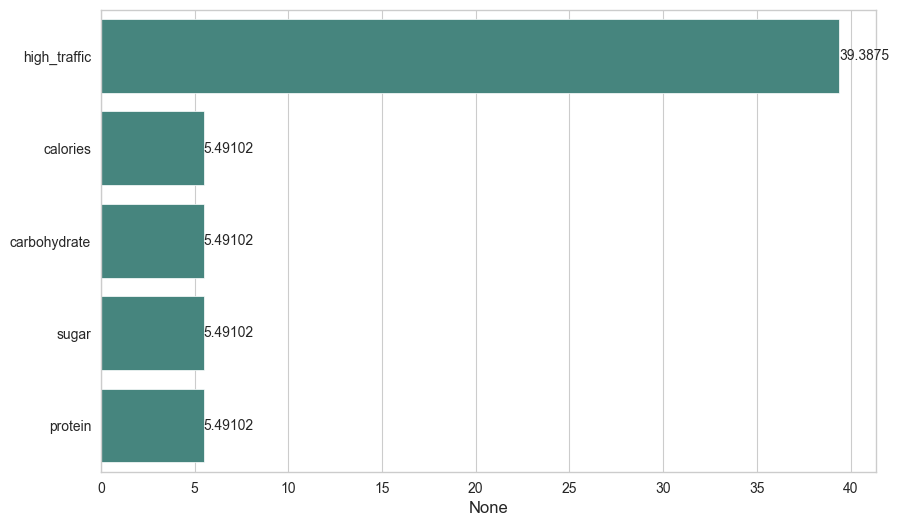

In [8]:
# Identify and complete missing values
df_isna=df.isna().sum().sort_values(ascending=False)
df_isna_perc=(df_isna[df_isna>0]*100)/len(df)
print(df_isna)
ax=sns.barplot(y=df_isna_perc.index, x=df_isna_perc)
ax.bar_label(ax.containers[0])
ax.set(ylabel=None)
plt.show()

## **DATA CLEANING**
- In "high_traffic" column, "High" was replaced with 1 and the missing value was filled with 0 (low traffic).
- Rows with missing values in "calories," "carbohydrate," "sugar," and "protein" columns were filled with the mean of the its feature column grouped by "category", "servings" and "high_traffic".
- "Chicken Breast" category was united with the "Chicken" category to ensure consistency in the categories.
- Values "4 as a snack" and "6 as a snack" in the "servings" column were replaced with "4" and "6," respectively, and the column type was changed to integer.

In [9]:
# Replace High with 1
df["high_traffic"] = df["high_traffic"].str.replace("High", "1")
# Input missing value of high_traffic with 0
df["high_traffic"] = df["high_traffic"].fillna("0")

In [10]:
grouped_means = df.groupby(["category", "servings", "high_traffic"])[["calories", "carbohydrate", "sugar", "protein"]].transform("mean")
grouped_means

,calories,carbohydrate,sugar,protein
0,765.760,18.744,7.334,68.978
1,429.422,59.197,3.715,10.399
2,381.916,39.425,4.094,25.958
3,97.030,30.560,38.630,0.020
4,164.891,14.146,15.588,0.568
...,...,...,...,...
942,561.089,51.188,6.298,40.456
943,312.203,69.528,2.970,5.857
944,584.294,32.832,8.064,27.299
945,314.176,47.672,3.886,6.467


In [11]:
# Imput missing values with grouped means
df[["calories", "carbohydrate", "sugar", "protein"]] = df[["calories", "carbohydrate", "sugar", "protein"]].fillna(grouped_means)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,765.760,18.744,7.334,68.978,Pork,6,1
1,2,35.480,38.560,0.660,0.920,Potato,4,1
2,3,914.280,42.680,3.090,2.880,Breakfast,1,0
3,4,97.030,30.560,38.630,0.020,Beverages,4,1
4,5,27.050,1.850,0.800,0.530,Beverages,4,0


In [12]:
# Identify and correct outliers
# Tukey method
from collections import Counter
def detect_outliers(df,n,features):

    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [13]:
outliers = detect_outliers(df,2, numeric_features)
print(df.loc[outliers,numeric_features])

Empty DataFrame
Columns: [calories, carbohydrate, sugar, protein]
Index: []


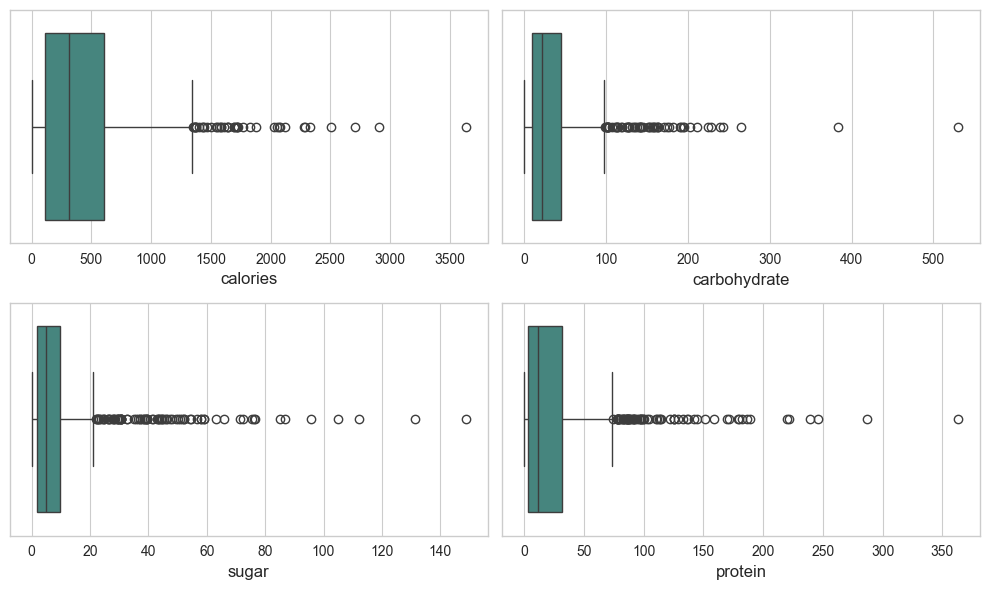

In [14]:
# Identify outliers with boxplot
fig, ax = plt.subplots(2, 2)
for i, col in enumerate(numeric_features):
    x = i // 2
    y = i % 2
    bp=sns.boxplot(data=df, x=col, ax=ax[x, y])
    bp.set(ylabel=None)  
plt.tight_layout()
plt.show()

I didn't find significant outliers with the Tukey Method or Boxplot Method.

In [15]:
# Clean data string
for col in object_features:
    print(df[col].value_counts(), "\n")

recipe
1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: count, Length: 947, dtype: int64 

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64 

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64 

high_traffic
1    574
0    373
Name: count, dtype: int64 



In [16]:
# Detect index to replace
df[(df["servings"]=="4 as a snack") | (df["servings"]=="6 as a snack")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.530,14.730,5.710,29.920,Lunch/Snacks,4 as a snack,1
548,549,1440.690,30.590,5.780,30.630,Lunch/Snacks,6 as a snack,1
735,736,513.750,65.870,18.630,18.390,Lunch/Snacks,4 as a snack,0


In [17]:
# Replace found index
df.loc[[451, 735], "servings"] = "4"
df.loc[548, "servings"] = "6"
df.loc[[451,548,735]]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.530,14.730,5.710,29.920,Lunch/Snacks,4,1
548,549,1440.690,30.590,5.780,30.630,Lunch/Snacks,6,1
735,736,513.750,65.870,18.630,18.390,Lunch/Snacks,4,0


In [18]:
# Replaces "Chicken Breast" with "Chicken"
df["category"]=df["category"].replace("Chicken Breast", "Chicken")

In [19]:
# Identify and remove duplicated
print(df.duplicated(keep=False).sum())
print(df[df.duplicated(keep=False)])

0
Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


## **EXPLORATY DATA ANALYSIS**
After a thorough investigation of the recipe dataset, including an analysis of the target variable `high_traffic` and various features, it has been determined that the dataset is well-structured and suitable for further analysis and modeling. The visualizations employed, such as histograms, box plots, scatter plots, bar charts, heat map, and groupby analyses, provided insights into the data distribution and relationships between variables.

### **Relationships between categorical features**

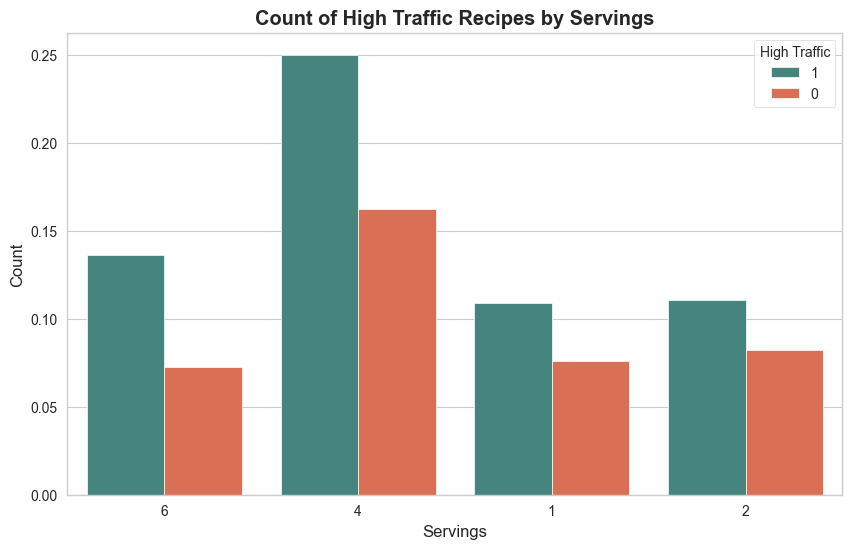

servings
4   0.413
6   0.209
2   0.193
1   0.185
Name: proportion, dtype: float64


In [20]:
# Count plot of high traffic recipes by servings
sns.countplot(data=df, x="servings", hue="high_traffic", stat="proportion")
plt.title("Count of High Traffic Recipes by Servings", fontweight='bold')
plt.xlabel("Servings")
plt.ylabel("Count")
plt.legend(title="High Traffic")
plt.show()
print(df["servings"].value_counts(normalize=True))

Based on the data visualitation of the relationship between the `high_traffic` variable and the `servings` feature, it can be observed that for each serving size, the number of recipes with high traffic is higher than the number of recipes with low traffic.
The value of 4 servings have the most proportion with 41.3% then 6 servings with 20.9% of total. This can influence in `high_traffic` variable.

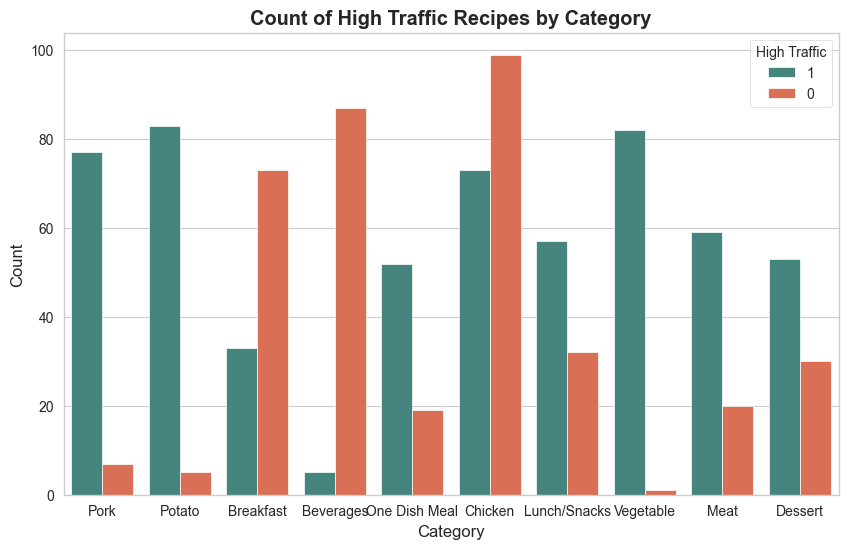

category
Chicken         0.182
Breakfast       0.112
Beverages       0.097
Lunch/Snacks    0.094
Potato          0.093
Pork            0.089
Vegetable       0.088
Dessert         0.088
Meat            0.083
One Dish Meal   0.075
Name: proportion, dtype: float64


In [21]:
# Count plot of high traffic recipes by category
sns.countplot(data=df, x="category", hue="high_traffic")
plt.title("Count of High Traffic Recipes by Category", fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="High Traffic")
plt.show()
print(df["category"].value_counts(normalize=True))

Based on the data visualitation of the relationship between the `high_traffic` variable and the `category` feature, we can observe that Pork, Potato and Vegetable values have the most proportion of "1" in the plot. It means that there is a higher likelihood of high traffic when recipes from these categories are featured on the homepage.
Mareover, One Dish Meal, Lunch/Snacks, Meant and Dessert have a likelihood of high traffic if they appear on the homepage.
However, Breakfast, Beverages and Chicken categories don´t have a high traffic. Therefore we must avoid them in the future.

### **Relationships between numerical features**

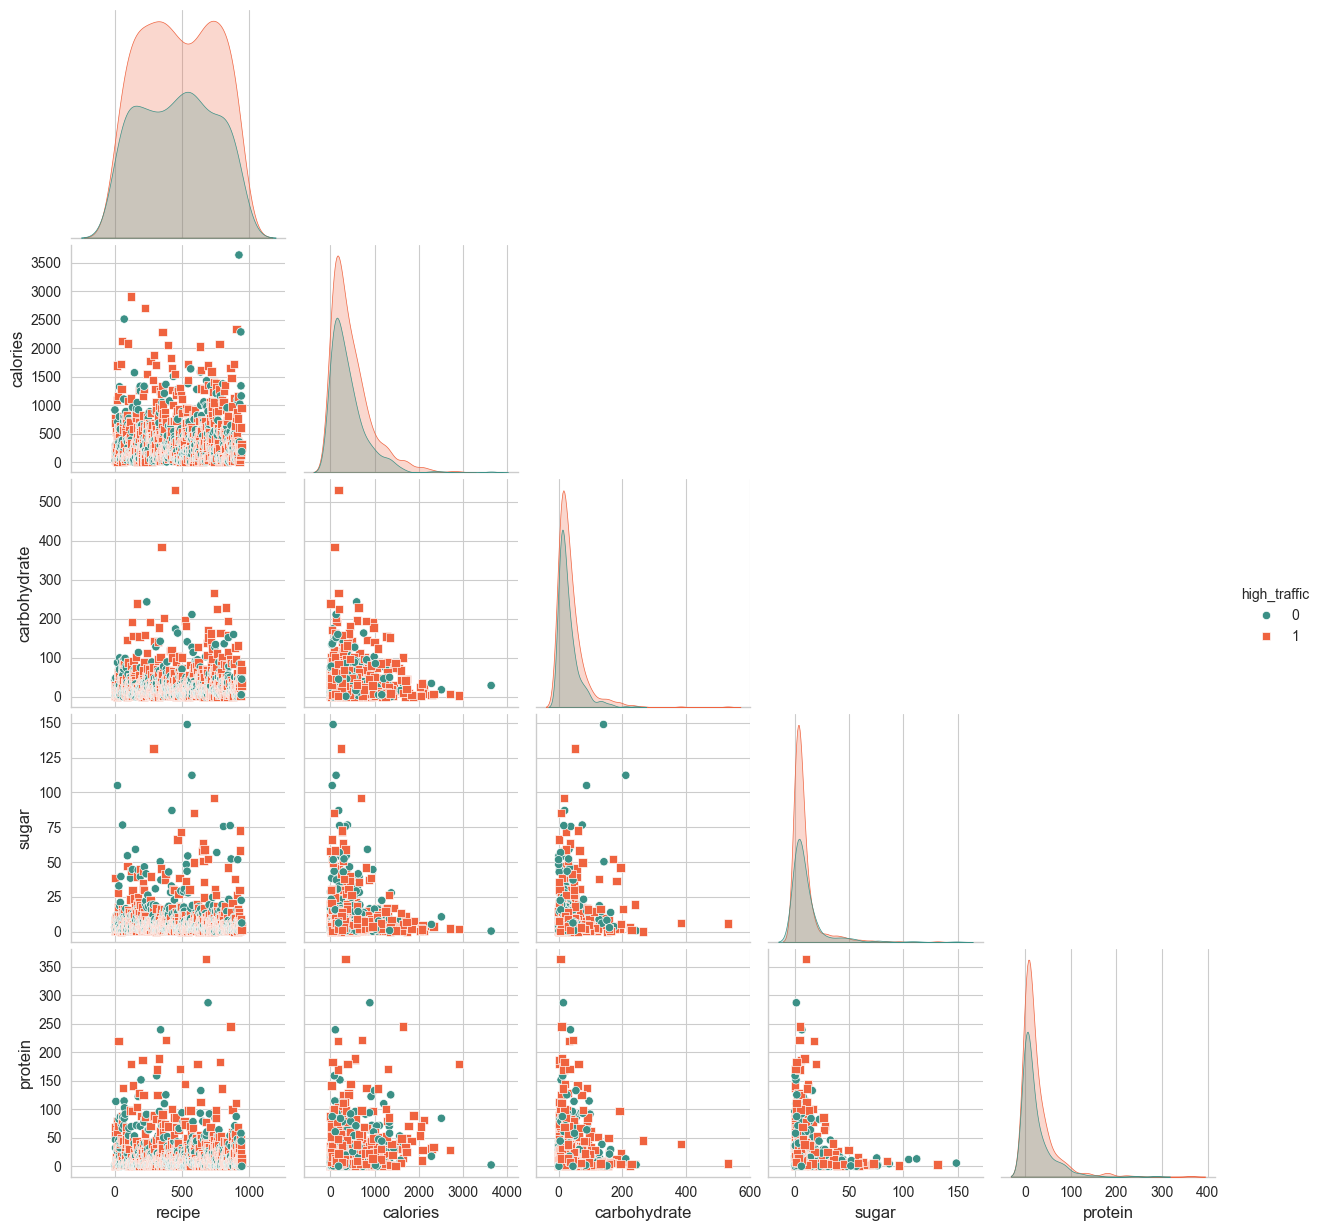

In [22]:
# Relationships between numerical features
df["high_traffic"] = df["high_traffic"].astype(int)
sns.pairplot(df, hue="high_traffic", corner=True, markers=["o", "s"])
plt.show()

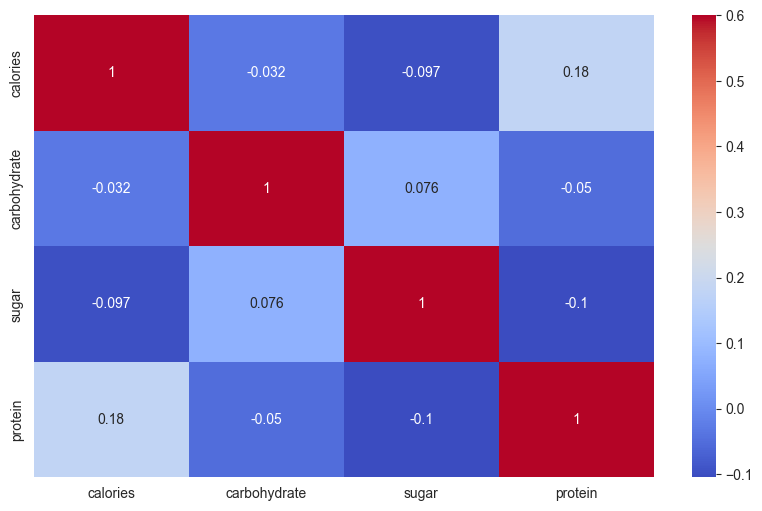

In [23]:
corrmat = df[numeric_features].corr()
sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)
plt.show()

From the heatmap above, we can observe the correlation between the numeric variables: calories, carbohydrate, sugar, protein, and servings. There aren't a strong correlation between numerical features.


### **Distributions in numerical features**

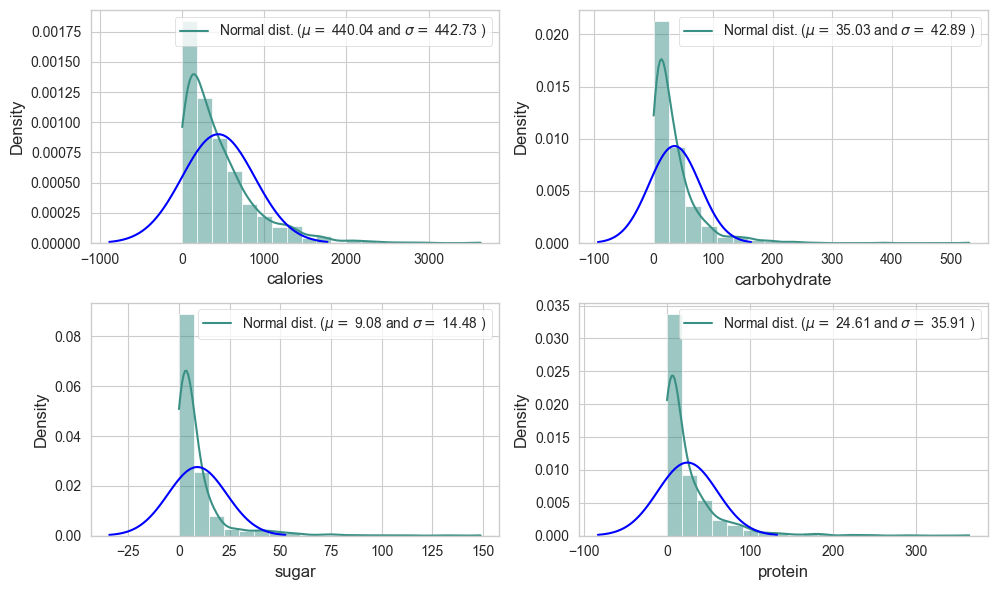

In [24]:
# Distribution vs Normal distribution
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(numeric_features):
    x = i // 2
    y = i % 2
    mu, sigma = df[col].mean(), df[col].std()
    a = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    b = norm.pdf(a, mu, sigma)

    hp = sns.histplot(df[col], kde=True, stat='density', bins=20, ax=ax[x, y])
    hp.plot(a, b, 'b')
    hp.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.tight_layout()
plt.show()

From the histograms above, we can see a little pattern between all plots. They is skewness to the left, is more close to zero.

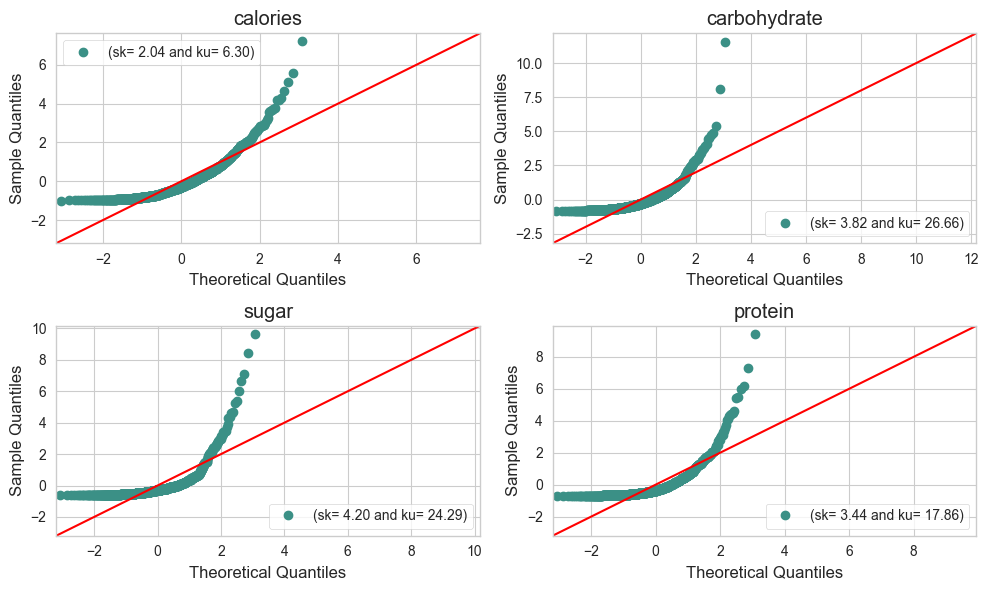

In [25]:
# Quantile quantile plot
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(numeric_features):
    x = i // 2
    y = i % 2
    skeww = stats.skew(df[col])
    kurt_value = kurtosis(df[col])
    qqp = sm.qqplot(df[col], line='45', ax=ax[x, y], fit=True)
    ax[x, y].set_title(col)
    ax[x, y].legend(['(sk= {:.2f} and ku= {:.2f})'.format(skeww, kurt_value)], loc='best')

plt.tight_layout()
plt.show()

From the quantile-quantile plots, we con deduce that the plots is skewness. Therefore I used the logaritmic transformation to correct this problem

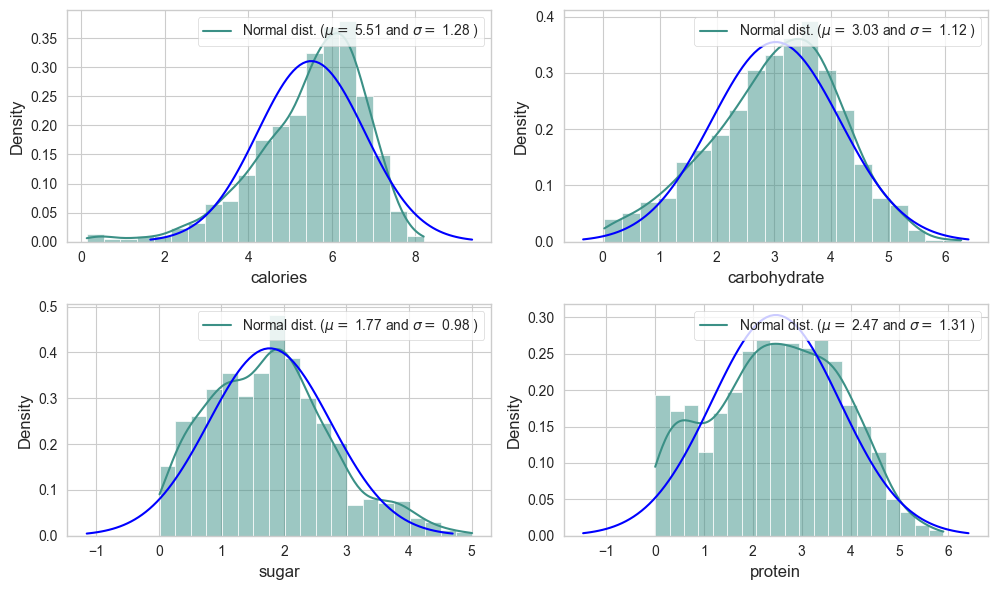

In [26]:
# Try apply logarithmic transformation to distribution
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(numeric_features):
    x = i // 2
    y = i % 2
    mu, sigma = np.log1p(df[col]).mean(), np.log1p(df[col]).std()
    a = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    b = norm.pdf(a, mu, sigma)

    hp = sns.histplot(np.log1p(df[col]), kde=True, stat='density', bins=20, ax=ax[x, y])
    hp.plot(a, b, 'b', label='Distribución normal')
    hp.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.tight_layout()
plt.show()

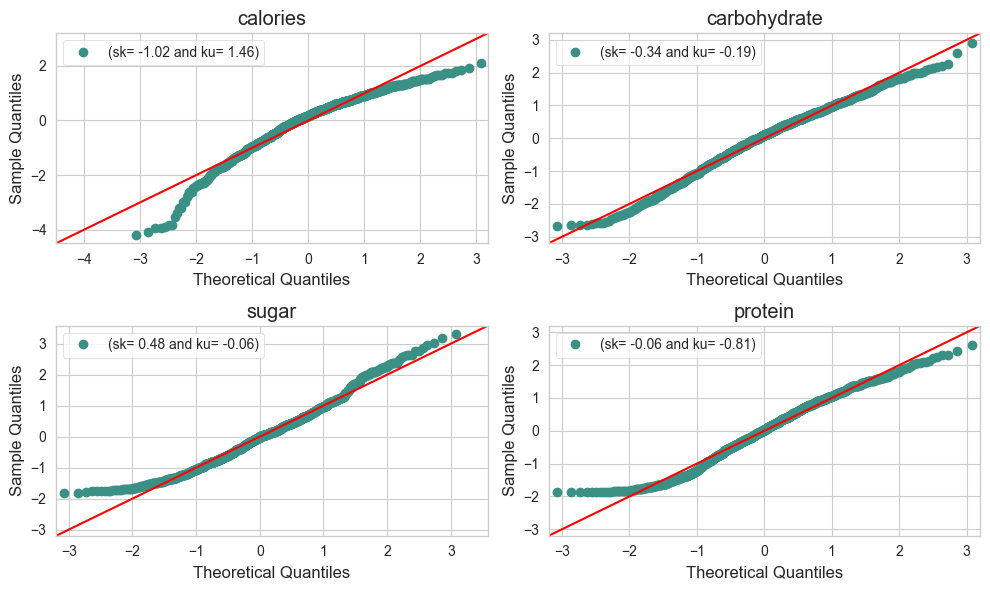

In [27]:
# Try apply logarithmic transformation to distribution
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(numeric_features):
    x = i // 2
    y = i % 2
    skeww = stats.skew(np.log1p(df[col]))
    kurt_value = kurtosis(np.log1p(df[col]))
    qqp = sm.qqplot(np.log1p(df[col]), line='45', ax=ax[x, y], fit=True)
    ax[x, y].set_title(col)
    ax[x, y].legend(['(sk= {:.2f} and ku= {:.2f})'.format(skeww, kurt_value)], loc='best')

plt.tight_layout()
plt.show()

In [28]:
# Apply logarithmic transformation to all numeric features
for col in numeric_features:
    df[col] = np.log1p(df[col])
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,6.642,2.983,2.120,4.248,Pork,6,1
1,2,3.597,3.678,0.507,0.652,Potato,4,1
2,3,6.819,3.777,1.409,1.356,Breakfast,1,0
3,4,4.585,3.452,3.680,0.020,Beverages,4,1
4,5,3.334,1.047,0.588,0.425,Beverages,4,0


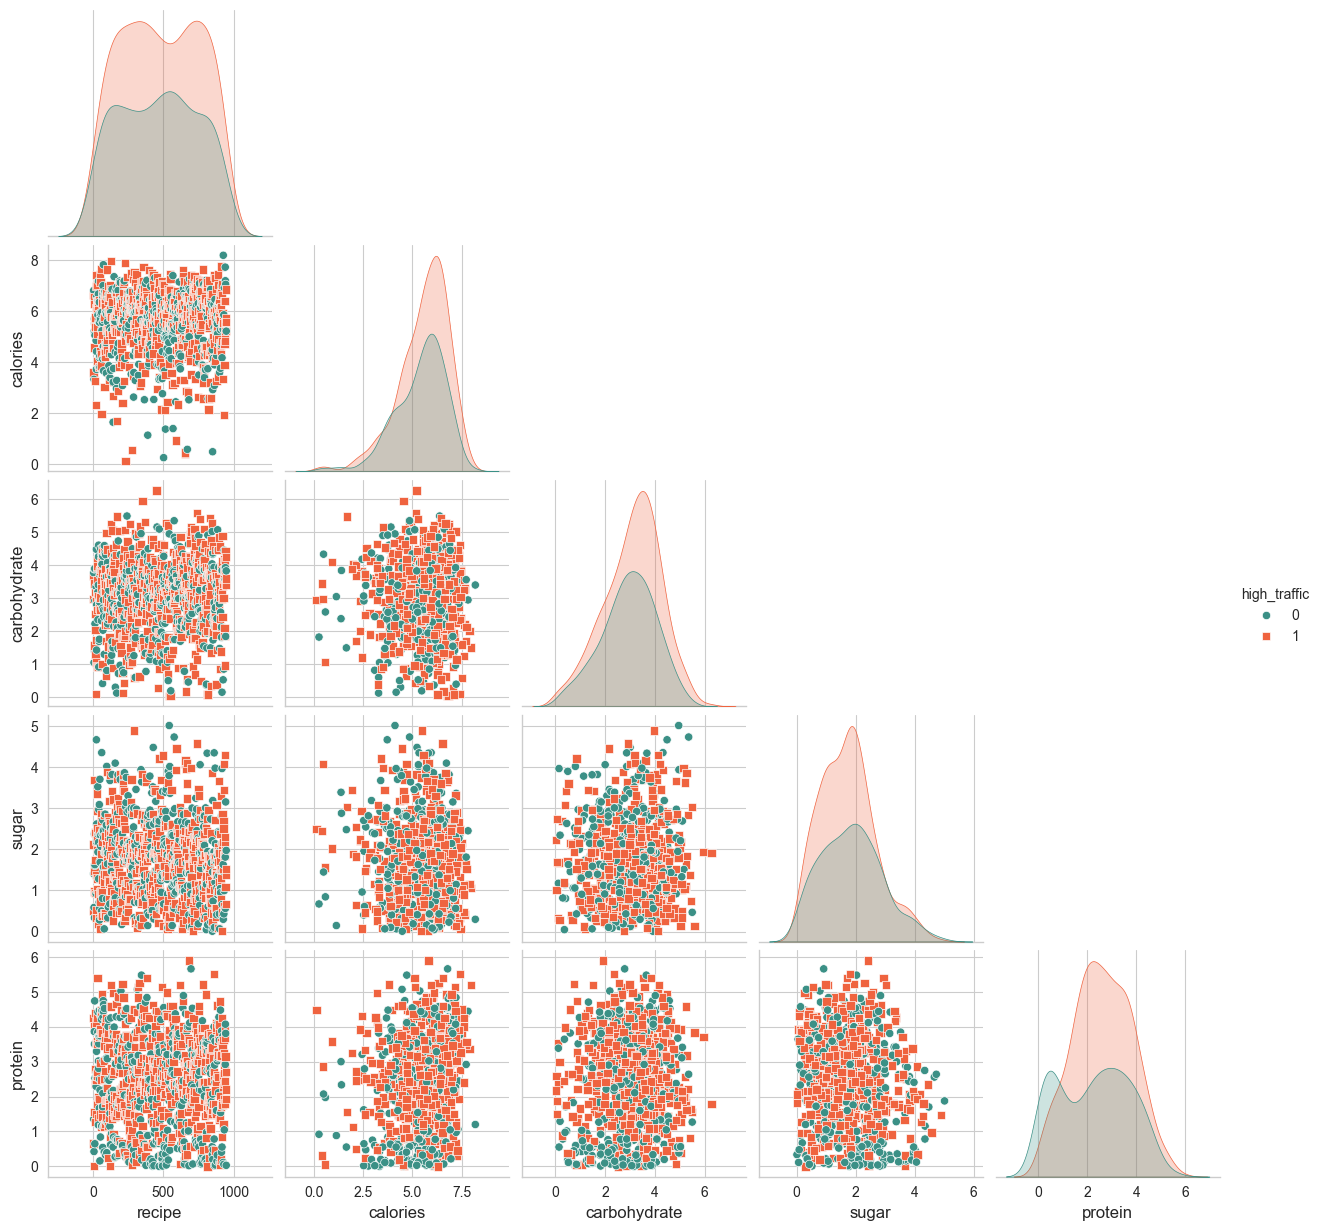

In [29]:
# Relationships between features
sns.pairplot(df, hue="high_traffic", corner=True, markers=["o", "s"])
plt.show()

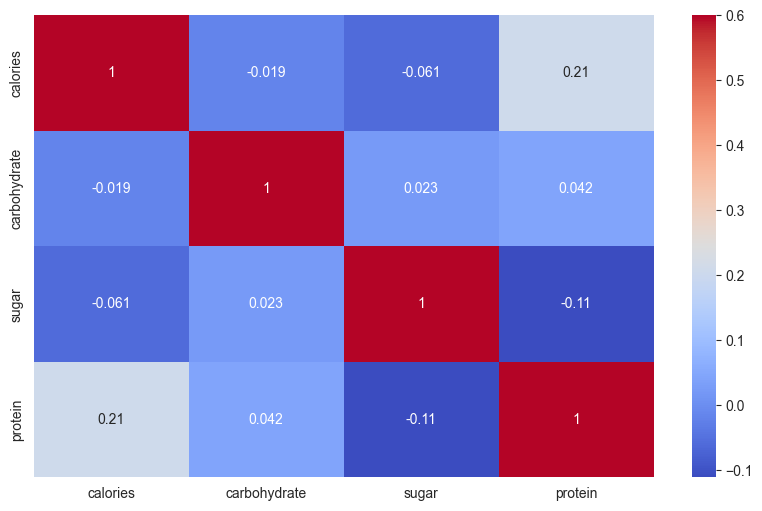

In [30]:
corrmat = df[numeric_features].corr()
sns.heatmap(corrmat, vmax=.6, cmap="coolwarm", annot=True)
plt.show()

The bar charts below display the count of the most frequent categories in the `servings`, `category`, and `high_traffic` variables.

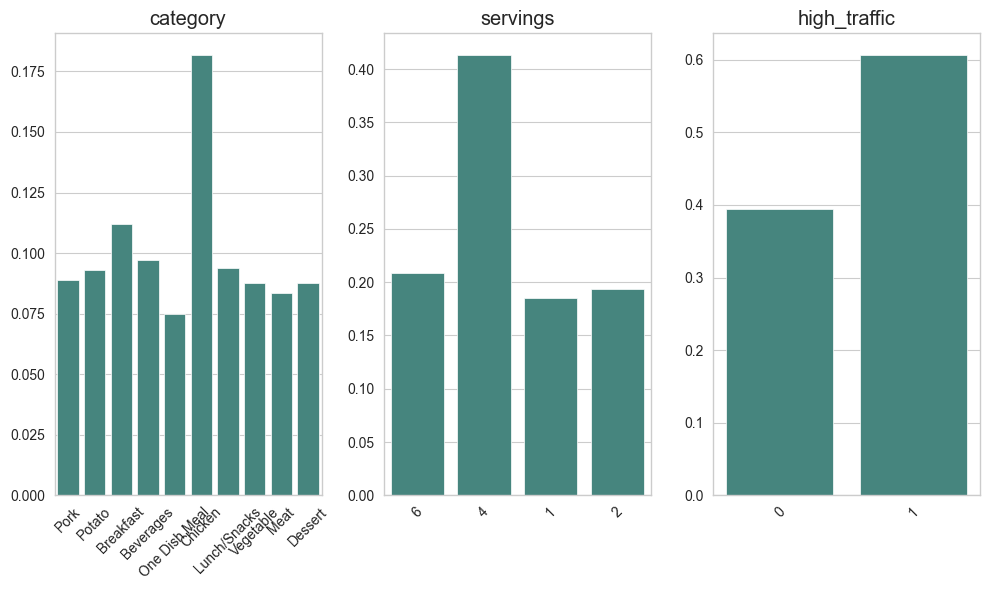

In [31]:
fig, ax = plt.subplots(1, 3)

for i, col in enumerate(object_features[1:]):
    cplt=sns.countplot(x=col, data=df, stat="proportion", ax=ax[i])
    ax[i].set_title(col)
    tick_labels = ax[i].get_xticklabels()
    tick_positions = np.arange(len(tick_labels))
    ax[i].set_xticks(tick_positions)
    ax[i].set_xticklabels(tick_labels, rotation=45)
    ax[i].set(ylabel=None, xlabel=None)

plt.tight_layout()
plt.show()

- The chicken category is the most popular `category` followed by potato and pork.
- Recipe with 4 servings is the most frequent `servings` followed by recipes with 6 servings.
- There are more recipe with high traffic compare with low traffic.

## FEATURE **ENGINEERING**

In [32]:
# Feature creation
df.category.value_counts().index

Index(['Chicken', 'Breakfast', 'Beverages', 'Lunch/Snacks', 'Potato', 'Pork',
       'Vegetable', 'Dessert', 'Meat', 'One Dish Meal'],
      dtype='object', name='category')

I created dummy values in `category` and `servings` features to modeling.

In [33]:
df1 = pd.get_dummies(df, columns=["category", "servings"], dtype=int)
df1.head()

,recipe,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,1,6.642,2.983,2.120,4.248,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,3.597,3.678,0.507,0.652,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,6.819,3.777,1.409,1.356,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,4,4.585,3.452,3.680,0.020,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,3.334,1.047,0.588,0.425,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
# Feature selection
df1.drop("recipe", axis=1, inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                947 non-null    float64
 1   carbohydrate            947 non-null    float64
 2   sugar                   947 non-null    float64
 3   protein                 947 non-null    float64
 4   high_traffic            947 non-null    int32  
 5   category_Beverages      947 non-null    int32  
 6   category_Breakfast      947 non-null    int32  
 7   category_Chicken        947 non-null    int32  
 8   category_Dessert        947 non-null    int32  
 9   category_Lunch/Snacks   947 non-null    int32  
 10  category_Meat           947 non-null    int32  
 11  category_One Dish Meal  947 non-null    int32  
 12  category_Pork           947 non-null    int32  
 13  category_Potato         947 non-null    int32  
 14  category_Vegetable      947 non-null    in

## **MODEL DEVELOPMENT**
Recipe Site Traffic is a binary classification problem and first I tried to search the best algorithm using cross_val_score

In [36]:
# Import librarie to model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split, ShuffleSplit, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, classification_report, roc_curve
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, VotingClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier as xgbc

In [37]:
X = df1.drop("high_traffic", axis=1)
y = df1["high_traffic"]
print(X.shape, y.shape)

(947, 18) (947,)


In [38]:
MLA = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
     
    LogisticRegressionCV(solver='lbfgs', max_iter=1000),
    RidgeClassifierCV(),
    Perceptron(),

    KNeighborsClassifier(n_neighbors=3),
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    xgbc() 
]

MLA1 = [
    make_pipeline(StandardScaler(),AdaBoostClassifier()),
    make_pipeline(StandardScaler(),BaggingClassifier()),
    make_pipeline(StandardScaler(),ExtraTreesClassifier()),
    make_pipeline(StandardScaler(),GradientBoostingClassifier()),
     
    make_pipeline(StandardScaler(),LogisticRegressionCV(solver='lbfgs', max_iter=1000)),
    make_pipeline(StandardScaler(),RidgeClassifierCV()),
    make_pipeline(StandardScaler(),Perceptron()),

    KNeighborsClassifier(n_neighbors=3),
    make_pipeline(StandardScaler(),SVC()),
    make_pipeline(StandardScaler(),DecisionTreeClassifier()),
    make_pipeline(StandardScaler(),ExtraTreeClassifier()),
    make_pipeline(StandardScaler(),xgbc()) 
]

In [39]:
result=[]
name=[]
result1=[]
name1=[]

seed = 21
n_folds = 10

cv_split = KFold(n_splits=n_folds, shuffle=True, random_state=seed)

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Score']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = cross_val_score(alg, X, y, cv  = cv_split, scoring="accuracy")
    MLA_compare.loc[row_index, 'MLA Score'] = cv_results.mean()
    MLA_compare.loc[row_index, 'MLA Std'] = cv_results.std()
    result.append(cv_results)
    name.append(MLA_name)
    row_index+=1

row_index = 0
for alg in MLA1:
    cv_results1 = cross_val_score(alg, X, y, cv  = cv_split, scoring="accuracy")
    MLA_compare.loc[row_index, 'MLA Score1'] = cv_results1.mean()
    MLA_compare.loc[row_index, 'MLA Std1'] = cv_results1.std()
    result1.append(cv_results1)
    row_index+=1 

MLA_compare.sort_values(by = ['MLA Score'], ascending = False, inplace = True, ignore_index=True)

MLA_compare

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_re

,MLA Name,MLA Parameters,MLA Score,MLA Std,MLA Score1,MLA Std1
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.760,0.038,0.755,0.038
1,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.760,0.039,0.760,0.039
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.757,0.037,0.753,0.039
3,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.736,0.046,0.736,0.046
4,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.734,0.044,0.737,0.034
5,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.718,0.030,0.719,0.032
6,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.700,0.044,0.730,0.039
7,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.691,0.031,0.691,0.031
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.682,0.042,0.675,0.029
9,Perceptron,"{'alpha': 0.0001, 'class_weight': None, 'early...",0.680,0.114,0.674,0.063


From the chart above, we can observe LogisticRegressionCV and RidgeClassifier got the best score 0.755 and 0.760 respectively.
Now only I used these two algorithms to develop the model

C:\Users\kevin\AppData\Local\Temp\ipykernel_28652\436621865.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(name)


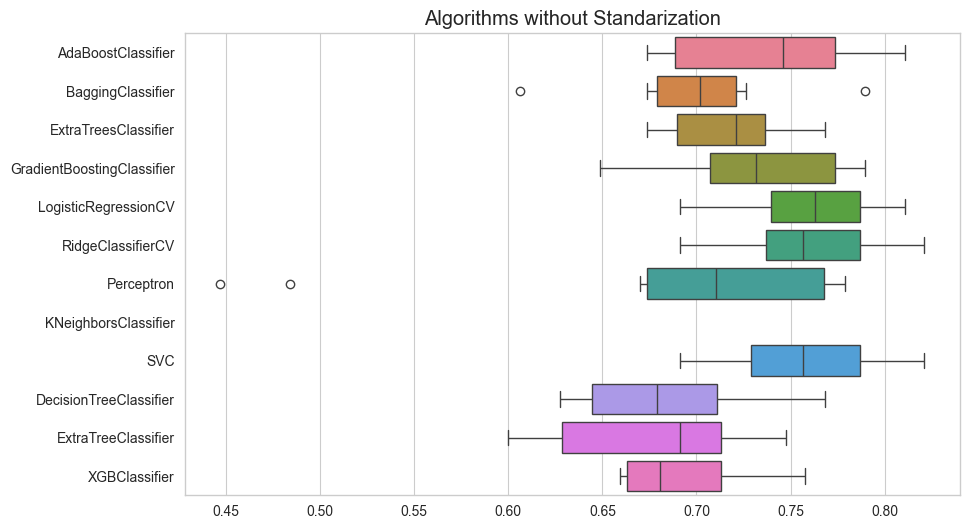

C:\Users\kevin\AppData\Local\Temp\ipykernel_28652\436621865.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(name)


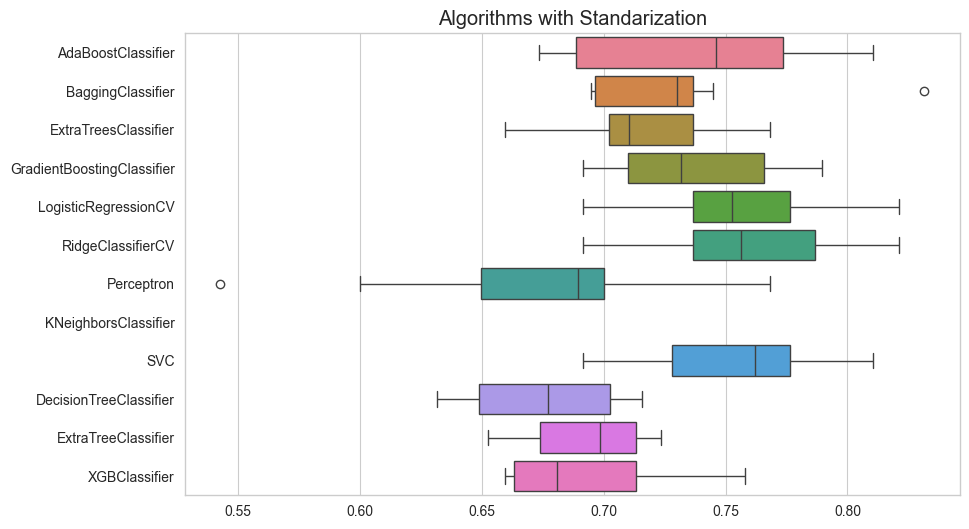

In [40]:
ax=sns.boxplot(result, orient="h")
ax.set_yticklabels(name)
plt.title("Algorithms without Standarization")
plt.show()

ax=sns.boxplot(result1, orient="h")
ax.set_yticklabels(name)
plt.title("Algorithms with Standarization")
plt.show()

In [41]:
# Create a param grid to choose the best hyparameter
param_grid = [     
    [{
    #LogisticRegressionCV
    "Cs":[20, 25],
    "fit_intercept":[True, False],
    "cv":[3, 4],
    "penalty":["l1", "l2", "elasticnet"],
    "solver":["lbfgs", "liblinear","newton-cg"],
    "random_state":[seed]
    }],
    [{
    #RidgeClassifierCV
    "alphas":[(20,200,400), (30,300,600)],
    "fit_intercept":[True, False],
    "cv":[6,7],
    "class_weight":["balanced", None]       
    }]
]
vote_est = [
    ('lr', LogisticRegressionCV()),
    ("rc", RidgeClassifierCV())
]

In the coding below, I used GridSearchCV to search the best hyperparameters and resolve the problem with the best score.

In [42]:
"""vote_alg = {}
for clf, param in zip(vote_est, param_grid):        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'accuracy')
    best_search.fit(X, y)

    best_param = best_search.best_params_
    best_score = best_search.best_score_
    vote_alg[clf[1].__class__.__name__]=best_search.best_estimator_
    print('The best parameter for {} is {}, score {:.3f}'.format(clf[1].__class__.__name__, best_param, best_score))
    clf[1].set_params(**best_param) """

"vote_alg = {}\nfor clf, param in zip(vote_est, param_grid):        \n    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'accuracy')\n    best_search.fit(X, y)\n\n    best_param = best_search.best_params_\n    best_score = best_search.best_score_\n    vote_alg[clf[1].__class__.__name__]=best_search.best_estimator_\n    print('The best parameter for {} is {}, score {:.3f}'.format(clf[1].__class__.__name__, best_param, best_score))\n    clf[1].set_params(**best_param) "

## **MODEL EVALUATION**

For the model evaluation, I will focus on 2 key metrics: Precision and ROC AUC.
- ROC AUC: Compute Area Under the Receiver Operating Characteristic Curve 

In [43]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model1 = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=20, cv=4, fit_intercept=False, penalty="l2", solver="lbfgs", random_state=seed))
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1)
y_pred_probs1 = model1.predict_proba(X_test)[:, 1]
roc_auc1 = roc_auc_score(y_test, y_pred_probs1)
print("The precision score is: ", precision1)
print("The ROC AUC score is: ", roc_auc1)
print(report1)


The precision score is:  0.8245614035087719
The ROC AUC score is:  0.8598901098901098
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        78
           1       0.82      0.84      0.83       112

    accuracy                           0.80       190
   macro avg       0.79      0.79      0.79       190
weighted avg       0.80      0.80      0.80       190



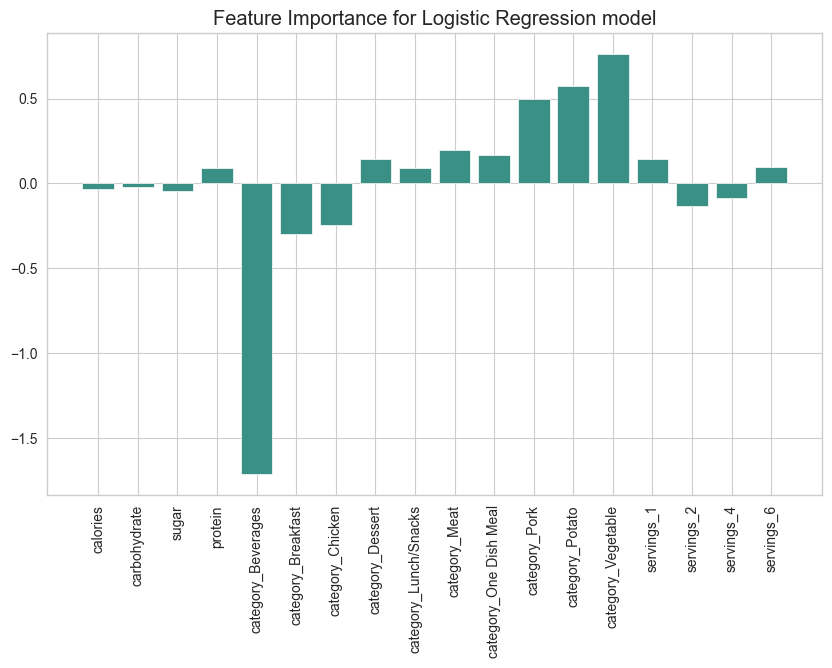

In [44]:
resultdict1 = {}
lr_model = model1.named_steps['logisticregressioncv']

for i, feature in enumerate(list(X)):
    resultdict1[feature] = lr_model.coef_[0][i]

plt.bar(resultdict1.keys(), resultdict1.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Logistic Regression model')
plt.show()

From the plot above, the "category_Vegetable" feature has the most significant effect on the prediction of high traffic. The Logistic Regression model's feature importance analysis further confirms this finding. Beside "category_Pork" and "category_Potato" have a significant effect in the model.
The Logistic Regression model got a precision of 0.825.


In [45]:
model2 = make_pipeline(StandardScaler(), RidgeClassifierCV(alphas=(20, 200, 400), class_weight=None, cv=6, fit_intercept=10))
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

y_pred_probs2 = model2.decision_function(X_test)
#y_pred2 = (y_pred_probs2 > 0).astype(int)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred_probs2)
report2 = classification_report(y_test, y_pred2)

print("The precision score is: ", precision2)
print("The ROC AUC score is: ", roc_auc2)
print(report2)

The precision score is:  0.8016528925619835
The ROC AUC score is:  0.8588598901098901
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.80      0.87      0.83       112

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


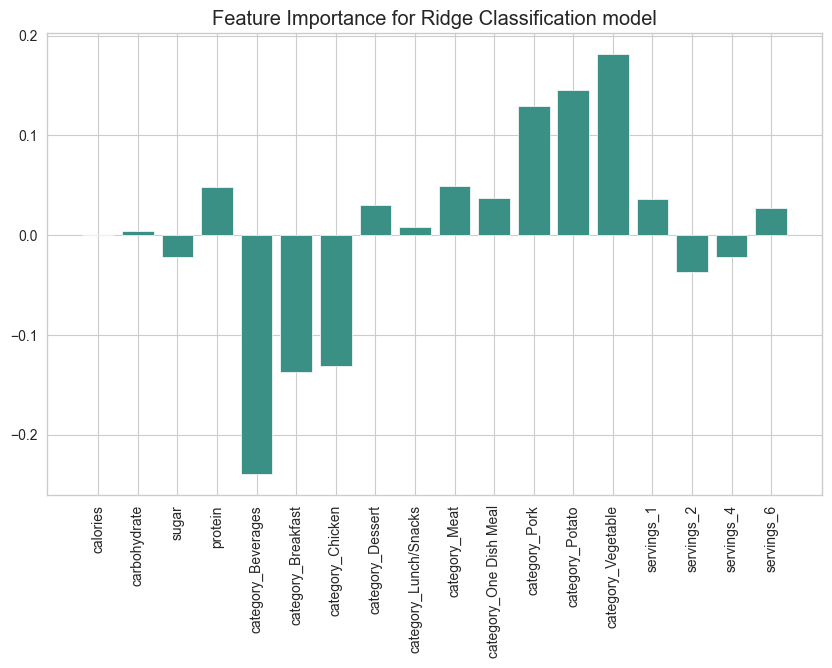

In [46]:
resultdict2 = {}
rc_model = model2.named_steps['ridgeclassifiercv']

for i, feature in enumerate(list(X)):
    resultdict2[feature] = rc_model.coef_[0][i]

plt.bar(resultdict2.keys(), resultdict2.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Ridge Classification model')
plt.show()

From the plot above, the "category_Vegetable" feature has the most significant effect on the prediction of high traffic. The Ridge Classifier model's feature importance analysis further confirms this finding. Beside "category_Pork" and "category_Potato" have a significant effect in the model, similiar to before model.
The Ridge Classifier model got a score of 0.802.

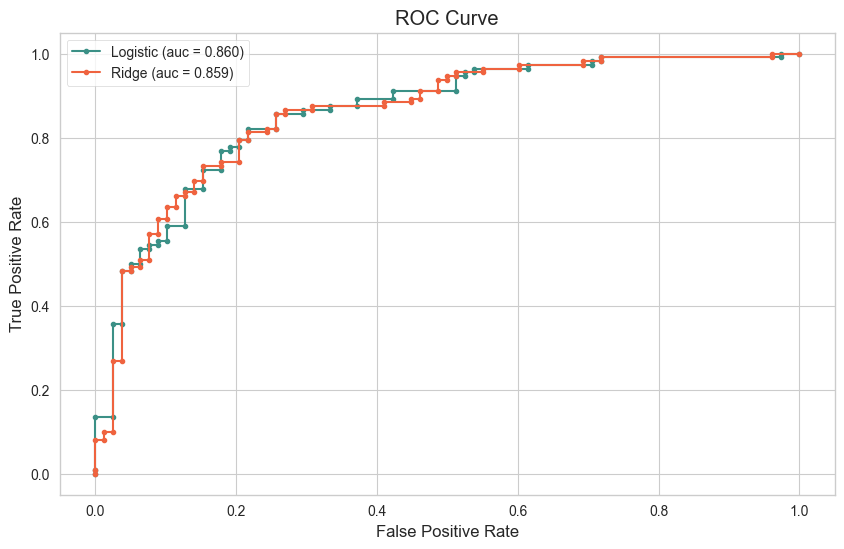

In [47]:
# Plot roc curve with roc auc score
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_probs1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_probs2)
fig, ax = plt.subplots(1, 1)

ax.plot(fpr1, tpr1, marker=".", label='Logistic (auc = %0.3f)'%roc_auc1)
ax.plot(fpr2, tpr2, marker=".", label='Ridge (auc = %0.3f)'%roc_auc2)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()

Both models are very similars, from the ROC curve plot above, we can see that they are practically overlapping, it suggests that there is no substantial difference in their ability to discriminate between positive and negative classes.

The Logistic Regression model outperforms the Ridge Classification model in predicting High traffic based on Precision ans AUC. The Logistic Regression model achieves a Precision of 0.825 and AUC of 0.860, while the Ridge Classification model achieves a Precision of 0.802 and AUC od 0.859. Therefore, the Logistic Regression model provides a better fit to the features and exhibits lower prediction errors compared to the Ridge Classification model.

## **BUSINESS FOCUS**

According to the problem, the goals to achieve are:
- Predict which recipes will lead to high traffic?
- Correctly predict high traffic recipes 80% of the time.

The Logistic Regression model effectively achieves both objectives, demonstrating elevated Precision and ROC score, all exceeding 80%. This signifies the model's proficiency in recognizing recipes with high traffic and delivering precise predictions with a substantial level of confidence. Consequently, the Logistic Regression model aligns well with the business goals, offering valuable insights into recipe performance and website traffic.

## **RECOMENDATIONS**
- Implementation of the Logistic Regression Model: Integrate the Logistic Regression model, which has been trained to predict recipes with high traffic, into the production environment. With an precision over 80% in identifying high-traffic recipes, this model can contribute to increased website traffic and overall performance.
- Enhance the model's predictive capabilities by gathering additional data. Consider collecting information on various factors such as recipe preparation time, cost per serving, ingredient details, user engagement metrics (e.g., time spent on the recipe page), and patterns of recipes viewed during the same user session.
- Explore efficient strategies for deploying the model, considering both performance and cost factors. Evaluate the feasibility of deploying the machine learning model on edge devices for enhanced convenience and security. Furthermore, conduct tests with newly onboarded product analysts to gather real-world feedback and refine the model's performance.
- Improve the model's features by expanding the range of categories and generating more meaningful features from existing variables. This may involve grouping similar categories, extracting relevant details from recipe descriptions, or integrating user interaction data to better capture user preferences.

## **BUSINESS METRICS**
The primary metric used by the company to assess model performance is the accuracy of predictions related to high traffic, serving as a key performance indicator (KPI). A higher accuracy percentage signifies a more effective model in accurately identifying recipes with high traffic. After thorough evaluation, it was determined that the Logistic Regression model achieved an accuracy of 80%, surpassing the Ridge classifier model, which exhibited a slightly lower accuracy of 79.5%. Consequently, the Logistic Regression model demonstrates superior performance compared to the Ridge classifier model in the precise prediction of high traffic recipes.

In [48]:
model1 = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=20, cv=4, fit_intercept=False, penalty="l2", solver="lbfgs", random_state=seed))
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
accuracy_train1 = accuracy_score(y_train, y_pred_train1)
print('Accuracy score of the train data:', accuracy_train1)
y_pred_test1 = model1.predict(X_test)
accuracy_test1 = accuracy_score(y_test, y_pred_test1)
print('Accuracy score of the test data:', accuracy_test1)

Accuracy score of the train data: 0.7516512549537648
Accuracy score of the test data: 0.8


In [49]:
model2 = make_pipeline(StandardScaler(), RidgeClassifierCV(alphas=(20, 200, 400), class_weight=None, cv=6, fit_intercept=10))
model2.fit(X_train, y_train)
y_pred_train2 = model2.predict(X_train)
accuracy_train2 = accuracy_score(y_train, y_pred_train2)
print('Accuracy score of the train data:', accuracy_train2)
y_pred_test2 = model2.predict(X_test)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
print('Accuracy score of the test data:', accuracy_test2)

Accuracy score of the train data: 0.7542932628797886
Accuracy score of the test data: 0.7947368421052632


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation